CSP MinConflicts

SEZIONE 1
Classi Variable,Constraint e Problem

In [1]:
from random import *

class Variable:
    #classe che rappresenta una variabile del csp, comprende il nome della variabile, il valore assunto da essa e il dominio dei valori possibili
    def __init__(self, tag,domain):
        self.tag=tag;
        self.value=0;
        self.domain=domain;
        
    def check_assignment(self, val):
        if(val in self.domain):
            return 1;
        return 0;
        
    def assign(self, val):
        if(self.check_assignment(val)==1):
            self.value=val;
            return 1;
        print("Valore al di fuori del dominio")
        return 0;
        
class Constraint:
    #classe che rappresenta un vincolo del csp, comprende un set di variabili su cui è definito il vincolo e la relazione che li vincola
    #la condizione è espressa tramite una funzione lambda con argomento le variabili su cui è definito il vincolo, e restituisce falso se il vincolo è violato
    def  __init__(self, var,cond):
        self.variables=var;
        self.condition=cond;
        
    def verify(self):
        return self.condition(self.variables);
    
    
        
class Problem:
    #classe che rappresenta il problema, definito su una serie di variabili e un insieme di vincoli  
        
    def __init__(self):
        self.variables=list();
        self.constraints=list();
        
    #metodo per l'aggiunta di una variabile    
    def add_var(self,var):
        self.variables.append(var);
    
    #metodo per l'aggiunta di un vincolo al problema
    def add_constraint(self,cons):
            self.constraints.append(cons);
            
    def nconflicts(self):
    #funzione che calcola il numero di conflitti all'interno del problema, dato l'assegnamento del valore v a var nello stato corrente
    #itera sull'insieme dei vincoli e conta quanti non vengono rispettati
        n=0;
        for i in range(len(self.constraints)):
            if(self.constraints[i].verify()==False):
                n=n+1;
        return n;
    
    def print_status(self):
        dim=len(self.variables)
        for i in range(dim):
            print(self.variables[i].tag," : ", self.variables[i].value);
        
        print("I conflitti nell'attuale configurazione sono: ", self.nconflicts(),"\n");
       

SEZIONE 2 MinConflicts solver

In [2]:
class Solver:
    #classe che permette di risolvere un csp tramite l'euristica MinConflicts
    
    def __init__(self,problem):
        self.csp=problem;
        
    def selConflictedVar(self,conflicts):
        #la funzione riceve in ingresso il numero di conflitti del problema e seleziona una variabile random tra quelle in conflitto
        #(restituisce l'indice della variabile nella lista delle variabili del problema)
        rand=randint(1,conflicts);
        count=0;
            
        for j in range(len(self.csp.constraints)):
                if(self.csp.constraints[j].verify()==False):
                    count=count+1;
                    if(count==rand):
                        ind=randint(0,len(self.csp.constraints[j].variables)-1);
                        var=self.csp.constraints[j].variables[ind];
                        for k in range(len(self.csp.variables)):
                            if(var.tag==self.csp.variables[k].tag):
                                return k;
                            
    def selMinConflictValue(self,var,conflicts):

        minvalue=var.value;
        
        for v in range(len(var.domain)):
                var.assign(var.domain[v]);
                if(self.csp.nconflicts()<conflicts):
                    minvalue=var.domain[v];
                    
        return minvalue;
                        
                                
         
    def min_conflicts(self, max_steps):
        #assegnamento iniziale casuale completo
        for i in range(len(self.csp.variables)):
            ind=randint(0,len(self.csp.variables[i].domain)-1);
            val=self.csp.variables[i].domain[ind];
            self.csp.variables[i].assign(val);
            
        #itero fino al numero massimo di step
        for i in range(max_steps):
          
            #calcolo il numero di conflitti nello stato attuale
            conflicts=self.csp.nconflicts();
            #se i conflitti sono 0 => stato consistente e ho trovato una soluzione
            if(conflicts==0):
                return self.csp,conflicts,i;
               
            #individuo una variabile random tra quelle in conflitto
            randvar=self.selConflictedVar(conflicts);
                                
            # individuo il valore v che minimizza il numero di conflitti nello stato attuale del csp e assegno alla variabile selezionata quel valore
            minValue=self.selMinConflictValue(self.csp.variables[randvar],conflicts);
            self.csp.variables[randvar].assign(minValue);
            
        
        #se si effettuano più steps del numero massimi stabilito l'algoritmo termina segnalando un fallimento nella ricerca della soluzione
        return self.csp,conflicts,max_steps;


SEZIONE 3 Costruttore per il problema delle n regine

In [3]:
def nQueensConstructor(n):
    
    nQueens=Problem();

    for i in range(n):
        nQueens.add_var(Variable(i+1,(range(1,n+1))));

    for i in range(n):
        for j in range(n):
            if(i!=j):
                nQueens.add_constraint(Constraint([nQueens.variables[i],nQueens.variables[j]], lambda a: a[0].value!=a[1].value));
                nQueens.add_constraint(Constraint([nQueens.variables[i],nQueens.variables[j]], lambda a: a[0].value!=(a[1].value+(a[0].tag-a[1].tag))));
                nQueens.add_constraint(Constraint([nQueens.variables[i],nQueens.variables[j]], lambda a: a[0].value!=(a[1].value-(a[0].tag-a[1].tag))));
    
    return nQueens;


SEZIONE 4 Costruttore di grafo con n nodi

In [4]:
import math

class Point:
    #la classe punto permette di rappresentare un generico punto in R2, definito da una coppia di valori x e y    
    def __init__(self,x,y):
        self.x=x;
        self.y=y;
        
    def distance(self,p2):
        #la funzione distance riceve un punto come input e ne calcola la distanza dal punto su cui viene invocata la funzione
        dx=p2.x-self.x
        dy=p2.y-self.y
        return math.hypot(dx,dy);
    
    def subtract(self, p2):
        return Point(self.x - p2.x, self.y - p2.y)
    
    
def cross_product(p1, p2):
    return p1.x * p2.y - p2.x * p1.y;

def direction(p1, p2, p3):
    return  cross_product(p3.subtract(p1), p2.subtract(p1));
    
class Segment:
    def __init__(self,a,b):
        self.e1=a;
        self.e2=b;
        
    def on_segment(self, p):
        p1=self.e1;
        p2=self.e2;
        return min(p1.x, p2.x) < p.x < max(p1.x, p2.x) and min(p1.y, p2.y) < p.y < max(p1.y, p2.y);
        
    def intersect(self,other):
        #la funzione intersect prende in ingresso un segmento e verifica se il segmento su cui viene invocata e quello in input si intersecano
        p1=self.e1;
        p2=self.e2;
        p3=other.e1;
        p4=other.e2;
        
        d1 = direction(p3, p4, p1)
        d2 = direction(p3, p4, p2)
        d3 = direction(p1, p2, p3)
        d4 = direction(p1, p2, p4)

        if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
            return True

        elif d1 == 0 and other.on_segment(p1):
            return True
        elif d2 == 0 and other.on_segment(p2):
            return True
        elif d3 == 0 and self.on_segment(p3):
            return True
        elif d4 == 0 and self.on_segment(p4):
            return True
        else:
            return False
       
        
class MyGraph:
    
    def __init__(self):
        self.nodes=[];
        self.edges=[];
    
    def add_node(self,var):
        if(var not in self.nodes):
            self.nodes.append(var);
        
    def add_edge(self,a,b):
        if(a in self.nodes and b in self.nodes):
            if((a,b) not in self.edges and (b,a) not in self.edges):
            
                self.edges.append((a,b));
                
    def number_of_nodes(self):
        return len(self.nodes);
    
    def number_of_edges(self):
        return len(self.edges);

    
def buildMap(n):
    G = MyGraph();
    points=[];         #lista dei punti del grafo
    segments=[];       #lista dei segmenti tracciati
    connectable=[];

    for i in range(n):
        x=random();
        y=random();
        points.append(Point(x,y));
        connectable.append(i);
        

    #si definisce i nodi su cui costruire il grafo del problema
    for i in range(n):
        G.add_node(i);

    while(len(connectable)>0):
        #scelgo un punto X randomico tra i vari punti ancora collegabili
        rand=randint(0,(len(connectable)-1));
        p1=connectable[rand];
    
        #calcolo le distanze di tale punto dagli altri punti collegabili
        distances=[];#lista in cui memorizzo le distanze dai punti collegabili
        dp=[];#lista in cui memorizzo che punto collegabile ha la distanza i-esima 
        
        for j in range(len(connectable)):
            if(connectable[j]!=p1):
                p2=connectable[j];
                if(((p1,p2) not in G.edges) and ((p2,p1) not in G.edges)):
                    d=points[p1].distance(points[p2]);
                    distances.append(d);
                    dp.append(p2);
        
        found=False;
        while(len(distances)>0 and found==False):
            #tra i punti trovo quello a distanza minima
            pos=0;#pos salva la posizione della distanza minima nel vettore delle distanze
            for j in range(1,len(distances)):
                if(distances[j]<=distances[pos]):
                    pos=j;
            pmin=dp[pos];
            
            #traccio il segmento tra p1 e pmin
            seg=Segment(points[p1],points[pmin]);
            
            #verifico se il segmento interseca uno dei segmenti già esistenti
            cross=False;
            for s in range(len(segments)):
                if(seg.intersect(segments[s])):
                    cross=True;
        
            #se nessuno interseca ho trovato una nuova connessione e individuo un nuovo punto iniziale
            #se almeno uno interseca passo al secondo punto con distanza minima
            if(cross==False):
                G.add_edge(p1,pmin);
                segments.append(seg);
                found=True;
            else:
                distances.pop(pos);
                dp.pop(pos);
        
        if(found==False):
            connectable.remove(p1);

    return G;



SEZIONE 5 Costruttore di un problema di colorazione delle regioni

In [5]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
from graphviz import Digraph


def mapConstructor(n,k):
    
    mapColoring=Problem()

    mapGraph=buildMap(n);

    for i in range(n):
        new_var=Variable(mapGraph.nodes[i],range(1,k+1));
        mapColoring.add_var(new_var);

    for i in range(mapGraph.number_of_edges()):
        e=mapGraph.edges[i];
        a=e[0];
        b=e[1];
        new_cons=Constraint([mapColoring.variables[a],mapColoring.variables[b]], lambda a: a[0].value!=a[1].value);
        mapColoring.add_constraint(new_cons);
    
    return mapColoring;


SEZIONE 6 
Codice per il testing del costruttore del problema delle n regine e della sua risoluzione tramite minConflicts.

In [21]:
n=8
attempts=50;
                
Q=nQueensConstructor(n);
NQSolver=Solver(Q);

sol_found=False;
while (attempts>0 and sol_found==False):
    tmp=NQSolver.min_conflicts(100);
    Q=tmp[0];
    if (tmp[1]==0):
        sol_found=True;
    attempts=attempts-1;

Q.print_status();

for i in range(n):
    for j in range(n):
        if(Q.variables[i].value==j+1):
            print(" Q ",end="");
        else:
            print(" . ",end="");
    print("\n");

1  :  3
2  :  6
3  :  4
4  :  1
5  :  8
6  :  5
7  :  7
8  :  2
I conflitti nell'attuale configurazione sono:  0 

 .  .  Q  .  .  .  .  . 

 .  .  .  .  .  Q  .  . 

 .  .  .  Q  .  .  .  . 

 Q  .  .  .  .  .  .  . 

 .  .  .  .  .  .  .  Q 

 .  .  .  .  Q  .  .  . 

 .  .  .  .  .  .  Q  . 

 .  Q  .  .  .  .  .  . 



SEZIONE 7
Codice per il testing della classe problema per un problema di mapColoring e sua risoluzione tramite minconflicts.

In [26]:
n=6;
k=4;
attempts=40;

mapC=mapConstructor(n,k);
MCSolver=Solver(mapC);

sol_found=False;
while (attempts>0 and sol_found==False):
    tmp=MCSolver.min_conflicts(100);
    mapC=tmp[0];
    if (tmp[1]==0):
        sol_found=True;
    attempts=attempts-1;

mapC.print_status();

dot = Digraph(comment='The colored map')

for i in range(n):
    dot.node(str(i),str(mapC.variables[i].value));

for i in range(len(mapC.constraints)):
    n1=mapC.constraints[i].variables[0].tag;
    n2=mapC.constraints[i].variables[1].tag;
    dot.edge(str(n1),str(n2));

dot.view();

0  :  2
1  :  4
2  :  3
3  :  4
4  :  2
5  :  1
I conflitti nell'attuale configurazione sono:  0 



SEZIONE 8 Codice per lo studio della risoluzione delle n regine al crescere della dimensione n

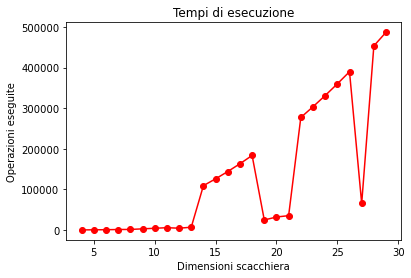

In [9]:
import matplotlib.pyplot as plt

NQueensDimension=[];
exeTime=[];

maxQueens=30;#dimensione massima delle righe/colonne della scacchiera che il calcolatore riesce a risolvere senza problemi

for i in range(4,maxQueens):
    
    NQueensDimension.append(i);
    
    problem=nQueensConstructor(i);
    cons=len(problem.constraints);
    
    probSolver=Solver(problem);
    
    complete=False;
    steps=0;
    stop=200;
    count=0
    for j in range(10,stop,10):
        sol=probSolver.min_conflicts(j);
        
        if(sol[1]==0):
            complete=True;
            steps=steps+sol[2];
            count=count+1;
            
    if complete:
        steps=(steps/count);
    else:
        steps=stop
        
    exeTime.append(steps*cons);


plt.plot(NQueensDimension, exeTime, marker = "o", color = 'red');
plt.title("Tempi di esecuzione");
plt.xlabel("Dimensioni scacchiera");
plt.ylabel("Operazioni eseguite");
plt.show()




SEZIONE 9
Codice per lo studio della risoluzione del map coloring al crescere della dimensione n

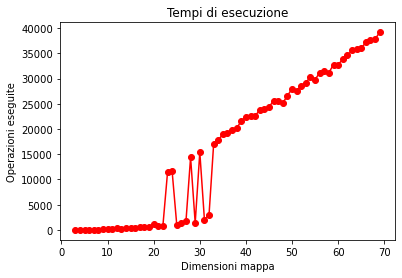

In [173]:
import matplotlib.pyplot as plt

mapDimension=[];
exeTime=[];
ncolor=4

maxRegions=70;#dimensione massima delle righe/colonne della scacchiera che il calcolatore riesce a risolvere senza problemi

for i in range(3,maxRegions):
    
    mapDimension.append(i);
    
    problem=mapConstructor(i,ncolor);
    cons=len(problem.constraints);
    
    probSolver=Solver(problem);
    
    complete=False;
    steps=0;
    stop=200;
    count=0
    for j in range(10,stop,10):
        sol=probSolver.min_conflicts(j);
        
        if(sol[1]==0):
            complete=True;
            steps=steps+sol[2];
            count=count+1;
            
    if complete:
        steps=(steps/count);
    else:
        steps=stop
        
    exeTime.append(steps*cons);


plt.plot(mapDimension, exeTime, marker = "o", color = 'red');
plt.title("Tempi di esecuzione");
plt.xlabel("Dimensioni mappa");
plt.ylabel("Operazioni eseguite");
plt.show()